In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['idnum', 'age', 'workerclass', 'interestincome', 
'traveltimetowork', 'vehicleoccupancy', 'meansoftransport', 
'marital', 'schoolenrollment', 'educationalattain', 
'sex', 'workarrivaltime', 'hoursworkperweek', 
'ancestry', 'degreefield', 'industryworkedin', 
'wages']

In [3]:
df = pd.read_csv('census_train.csv',header=None, names=cols, na_values='?')
df=df.astype(float)
df.head()

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,0.0,58.0,3.0,0.0,40.0,2.0,1.0,1.0,1.0,22.0,1.0,84.0,40.0,32.0,2300.0,7870.0,110000.0
1,1.0,34.0,3.0,0.0,10.0,1.0,1.0,5.0,1.0,16.0,1.0,168.0,40.0,51.0,NaN,7860.0,34500.0
2,2.0,57.0,2.0,0.0,15.0,8.0,1.0,5.0,1.0,16.0,1.0,100.0,30.0,51.0,NaN,8390.0,4700.0
3,3.0,17.0,NaN,0.0,NaN,NaN,NaN,5.0,2.0,15.0,2.0,NaN,NaN,714.0,NaN,NaN,0.0
4,4.0,42.0,1.0,0.0,20.0,1.0,1.0,1.0,1.0,22.0,1.0,92.0,45.0,21.0,5001.0,6990.0,120000.0


In [4]:
df['industryworkedin'].replace(np.nan,0,inplace=True)
bins = [-1, 169,290,490, 690, 770,3990,4590,5790,6390,6780,7190,7790,7890,8290,8470,8690,9290,9590,9870,9920]
names = ['No Industry', 'AGR', 'EXT', 'UTL', 'CON','MFG','WHL','RET','TRN','INF','FIN','PRF','EDU',
         'MED','SCA','ENT','SRV','EDM','MIL','Unemployed']
df['industry']=pd.cut(df['industryworkedin'],bins,labels=names)

In [5]:
df['workarrivaltime'].replace(np.nan,0,inplace=True)
bins = [-2,0,70,142,214,285]
names=['nowork','late_night','morning','afternoon','night']
df['workarrival']=pd.cut(df['workarrivaltime'],bins,labels=names)

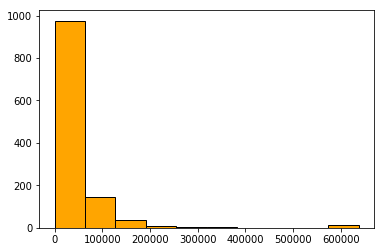

In [6]:
plt.hist(df['wages'], color = 'orange', edgecolor = 'black')
plt.show()

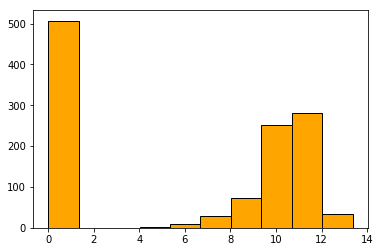

In [7]:
plt.hist(np.log1p(df['wages']), color = 'orange', edgecolor = 'black')
plt.show()

In [8]:
df.shape

(1184, 19)

In [9]:
df.isnull().sum()

idnum                  0
age                    0
workerclass          378
interestincome         0
traveltimetowork     576
vehicleoccupancy     775
meansoftransport     543
marital                0
schoolenrollment       0
educationalattain      0
sex                    0
workarrivaltime        0
hoursworkperweek     465
ancestry               0
degreefield          766
industryworkedin       0
wages                  0
industry               0
workarrival            0
dtype: int64

In [10]:
df.describe()

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
count,1184.000000,1184.000000,806.000000,1184.000000,608.000000,409.000000,641.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,719.000000,1184.000000,418.000000,1184.000000,1184.00000
mean,703.373311,48.086993,2.250620,2993.521959,32.745066,1.117359,2.847114,2.762669,1.182432,18.612331,1.535473,55.029561,38.229485,439.025338,4524.153110,4633.986486,35786.52027
std,408.865047,20.066332,1.936692,24243.640541,25.838284,0.491014,3.148665,1.826894,0.480028,2.709530,0.498951,60.862538,12.677769,403.688048,1633.451509,3694.669587,74676.01826
min,0.000000,15.000000,1.000000,-1400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,1103.000000,0.000000,0.00000
25%,351.750000,31.000000,1.000000,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,0.000000,35.000000,51.000000,2599.500000,0.000000,0.00000
50%,700.500000,47.000000,1.000000,0.000000,25.000000,1.000000,1.000000,2.000000,1.000000,19.000000,2.000000,55.000000,40.000000,261.000000,5200.000000,6180.000000,8500.00000
75%,1061.250000,63.000000,3.000000,0.000000,45.000000,1.000000,4.000000,5.000000,1.000000,21.000000,2.000000,98.000000,42.000000,921.000000,6107.000000,7872.500000,48000.00000
max,1403.000000,95.000000,9.000000,329000.000000,138.000000,8.000000,12.000000,5.000000,3.000000,24.000000,2.000000,282.000000,99.000000,999.000000,6402.000000,9920.000000,638000.00000


### Categorical Variables

In [11]:
df['workerclass'].replace(np.nan,0,inplace=True)
df['vehicleoccupancy'].replace(np.nan,77,inplace=True)
df['meansoftransport'].replace(np.nan,0,inplace=True)
df['schoolenrollment'].replace(np.nan,0,inplace=True)
df['educationalattain'].replace(np.nan,0,inplace=True)
df['workarrivaltime'].replace(np.nan,0,inplace=True)
df['degreefield'].replace(np.nan,0,inplace=True)
df['industry'].replace(np.nan,0,inplace=True)

### Numerical Variables

In [12]:
df['interestincome'].replace(np.nan,0,inplace=True)
df['traveltimetowork'].replace(np.nan,0,inplace=True)
df['hoursworkperweek'].replace(np.nan,0,inplace=True)

###  Target Variable

In [13]:
df['wages'].replace(np.nan,0,inplace=True)

### One Hot Encoding

In [14]:
workerclass = ['workerclass_0.0','workerclass_1.0','workerclass_2.0','workerclass_3.0','workerclass_4.0',
               'workerclass_5.0','workerclass_6.0','workerclass_7.0','workerclass_8.0','workerclass_9.0']
vehicleoccupancy=['vehicleoccupancy_1.0','vehicleoccupancy_2.0','vehicleoccupancy_3.0','vehicleoccupancy_4.0','vehicleoccupancy_5.0',
                  'vehicleoccupancy_6.0','vehicleoccupancy_7.0','vehicleoccupancy_8.0','vehicleoccupancy_9.0','vehicleoccupancy_10.0',
                  'vehicleoccupancy_77.0']
meansoftransport = ['meansoftransport_0.0',
                    'meansoftransport_1.0',
                    'meansoftransport_2.0',
                    'meansoftransport_3.0',
                    'meansoftransport_4.0',
                    'meansoftransport_5.0',
                    'meansoftransport_6.0',
                    'meansoftransport_7.0',
                    'meansoftransport_8.0',
                    'meansoftransport_9.0',
                    'meansoftransport_10.0',
                    'meansoftransport_11.0',
                    'meansoftransport_12.0'
                   ]

schoolenrollment = [
                    'schoolenrollment_0.0',
                    'schoolenrollment_1.0',
                    'schoolenrollment_2.0',
                    'schoolenrollment_3.0'
                    ]
educationalattain = [
                    'educationalattain_0.0',
                    'educationalattain_15.0',
                    'educationalattain_16.0',
                    'educationalattain_17.0',
                    'educationalattain_18.0',
                    'educationalattain_19.0',
                    'educationalattain_20.0',
                    'educationalattain_21.0',
                    'educationalattain_22.0',
                    'educationalattain_23.0',
                    'educationalattain_24.0'
                    ]
marital = [
            'marital_1.0',
            'marital_2.0',
            'marital_3.0',
            'marital_4.0',
            'marital_5.0'
        ]

In [15]:
workarrivaltime = [
    'workarrivaltime_0.0', 'workarrivaltime_1.0', 'workarrivaltime_2.0', 'workarrivaltime_3.0', 
    'workarrivaltime_4.0', 'workarrivaltime_5.0', 'workarrivaltime_6.0', 'workarrivaltime_7.0', 
    'workarrivaltime_8.0', 'workarrivaltime_9.0', 'workarrivaltime_10.0', 'workarrivaltime_11.0', 
    'workarrivaltime_12.0', 'workarrivaltime_13.0', 'workarrivaltime_14.0', 'workarrivaltime_15.0', 
    'workarrivaltime_16.0', 'workarrivaltime_17.0', 'workarrivaltime_18.0', 'workarrivaltime_19.0', 
    'workarrivaltime_20.0', 'workarrivaltime_21.0', 'workarrivaltime_22.0', 'workarrivaltime_23.0', 
    'workarrivaltime_24.0', 'workarrivaltime_25.0', 'workarrivaltime_26.0', 'workarrivaltime_27.0', 
    'workarrivaltime_28.0', 'workarrivaltime_29.0', 'workarrivaltime_30.0', 'workarrivaltime_31.0', 
    'workarrivaltime_32.0', 'workarrivaltime_33.0', 'workarrivaltime_34.0', 'workarrivaltime_35.0', 
    'workarrivaltime_36.0', 'workarrivaltime_37.0', 'workarrivaltime_38.0', 'workarrivaltime_39.0', 
    'workarrivaltime_40.0', 'workarrivaltime_41.0', 'workarrivaltime_42.0', 'workarrivaltime_43.0', 
    'workarrivaltime_44.0', 'workarrivaltime_45.0', 'workarrivaltime_46.0', 'workarrivaltime_47.0', 
    'workarrivaltime_48.0', 'workarrivaltime_49.0', 'workarrivaltime_50.0', 'workarrivaltime_51.0', 
    'workarrivaltime_52.0', 'workarrivaltime_53.0', 'workarrivaltime_54.0', 'workarrivaltime_55.0', 
    'workarrivaltime_56.0', 'workarrivaltime_57.0', 'workarrivaltime_58.0', 'workarrivaltime_59.0', 
    'workarrivaltime_60.0', 'workarrivaltime_61.0', 'workarrivaltime_62.0', 'workarrivaltime_63.0', 
    'workarrivaltime_64.0', 'workarrivaltime_65.0', 'workarrivaltime_66.0', 'workarrivaltime_67.0', 
    'workarrivaltime_68.0', 'workarrivaltime_69.0', 'workarrivaltime_70.0', 'workarrivaltime_71.0', 
    'workarrivaltime_72.0', 'workarrivaltime_73.0', 'workarrivaltime_74.0', 'workarrivaltime_75.0', 
    'workarrivaltime_76.0', 'workarrivaltime_77.0', 'workarrivaltime_78.0', 'workarrivaltime_79.0', 
    'workarrivaltime_80.0', 'workarrivaltime_81.0', 'workarrivaltime_82.0', 'workarrivaltime_83.0', 
    'workarrivaltime_84.0', 'workarrivaltime_85.0', 'workarrivaltime_86.0', 'workarrivaltime_87.0', 
    'workarrivaltime_88.0', 'workarrivaltime_89.0', 'workarrivaltime_90.0', 'workarrivaltime_91.0', 
    'workarrivaltime_92.0', 'workarrivaltime_93.0', 'workarrivaltime_94.0', 'workarrivaltime_95.0', 
    'workarrivaltime_96.0', 'workarrivaltime_97.0', 'workarrivaltime_98.0', 'workarrivaltime_99.0', 
    'workarrivaltime_100.0', 'workarrivaltime_101.0', 'workarrivaltime_102.0', 'workarrivaltime_103.0', 
    'workarrivaltime_104.0', 'workarrivaltime_105.0', 'workarrivaltime_106.0', 'workarrivaltime_107.0', 
    'workarrivaltime_108.0', 'workarrivaltime_109.0', 'workarrivaltime_110.0', 'workarrivaltime_111.0', 
    'workarrivaltime_112.0', 'workarrivaltime_113.0', 'workarrivaltime_114.0', 'workarrivaltime_115.0', 
    'workarrivaltime_116.0', 'workarrivaltime_117.0', 'workarrivaltime_118.0', 'workarrivaltime_119.0', 
    'workarrivaltime_120.0', 'workarrivaltime_121.0', 'workarrivaltime_122.0', 'workarrivaltime_123.0', 
    'workarrivaltime_124.0', 'workarrivaltime_125.0', 'workarrivaltime_126.0', 'workarrivaltime_127.0', 
    'workarrivaltime_128.0', 'workarrivaltime_129.0', 'workarrivaltime_130.0', 'workarrivaltime_131.0', 
    'workarrivaltime_132.0', 'workarrivaltime_133.0', 'workarrivaltime_134.0', 'workarrivaltime_135.0', 
    'workarrivaltime_136.0', 'workarrivaltime_137.0', 'workarrivaltime_138.0', 'workarrivaltime_139.0', 
    'workarrivaltime_140.0', 'workarrivaltime_141.0', 'workarrivaltime_142.0', 'workarrivaltime_143.0', 
    'workarrivaltime_144.0', 'workarrivaltime_145.0', 'workarrivaltime_146.0', 'workarrivaltime_147.0', 
    'workarrivaltime_148.0', 'workarrivaltime_149.0', 'workarrivaltime_150.0', 'workarrivaltime_151.0', 
    'workarrivaltime_152.0', 'workarrivaltime_153.0', 'workarrivaltime_154.0', 'workarrivaltime_155.0', 
    'workarrivaltime_156.0', 'workarrivaltime_157.0', 'workarrivaltime_158.0', 'workarrivaltime_159.0', 
    'workarrivaltime_160.0', 'workarrivaltime_161.0', 'workarrivaltime_162.0', 'workarrivaltime_163.0', 
    'workarrivaltime_164.0', 'workarrivaltime_165.0', 'workarrivaltime_166.0', 'workarrivaltime_167.0', 
    'workarrivaltime_168.0', 'workarrivaltime_169.0', 'workarrivaltime_170.0', 'workarrivaltime_171.0', 
    'workarrivaltime_172.0', 'workarrivaltime_173.0', 'workarrivaltime_174.0', 'workarrivaltime_175.0', 
    'workarrivaltime_176.0', 'workarrivaltime_177.0', 'workarrivaltime_178.0', 'workarrivaltime_179.0', 
    'workarrivaltime_180.0', 'workarrivaltime_181.0', 'workarrivaltime_182.0', 'workarrivaltime_183.0', 
    'workarrivaltime_184.0', 'workarrivaltime_185.0', 'workarrivaltime_186.0', 'workarrivaltime_187.0', 
    'workarrivaltime_188.0', 'workarrivaltime_189.0', 'workarrivaltime_190.0', 'workarrivaltime_191.0', 
    'workarrivaltime_192.0', 'workarrivaltime_193.0', 'workarrivaltime_194.0', 'workarrivaltime_195.0', 
    'workarrivaltime_196.0', 'workarrivaltime_197.0', 'workarrivaltime_198.0', 'workarrivaltime_199.0', 
    'workarrivaltime_200.0', 'workarrivaltime_201.0', 'workarrivaltime_202.0', 'workarrivaltime_203.0', 
    'workarrivaltime_204.0', 'workarrivaltime_205.0', 'workarrivaltime_206.0', 'workarrivaltime_207.0', 
    'workarrivaltime_208.0', 'workarrivaltime_209.0', 'workarrivaltime_210.0', 'workarrivaltime_211.0', 
    'workarrivaltime_212.0', 'workarrivaltime_213.0', 'workarrivaltime_214.0', 'workarrivaltime_215.0', 
    'workarrivaltime_216.0', 'workarrivaltime_217.0', 'workarrivaltime_218.0', 'workarrivaltime_219.0', 
    'workarrivaltime_220.0', 'workarrivaltime_221.0', 'workarrivaltime_222.0', 'workarrivaltime_223.0', 
    'workarrivaltime_224.0', 'workarrivaltime_225.0', 'workarrivaltime_226.0', 'workarrivaltime_227.0', 
    'workarrivaltime_228.0', 'workarrivaltime_229.0', 'workarrivaltime_230.0', 'workarrivaltime_231.0', 
    'workarrivaltime_232.0', 'workarrivaltime_233.0', 'workarrivaltime_234.0', 'workarrivaltime_235.0', 
    'workarrivaltime_236.0', 'workarrivaltime_237.0', 'workarrivaltime_238.0', 'workarrivaltime_239.0', 
    'workarrivaltime_240.0', 'workarrivaltime_241.0', 'workarrivaltime_242.0', 'workarrivaltime_243.0', 
    'workarrivaltime_244.0', 'workarrivaltime_245.0', 'workarrivaltime_246.0', 'workarrivaltime_247.0', 
    'workarrivaltime_248.0', 'workarrivaltime_249.0', 'workarrivaltime_250.0', 'workarrivaltime_251.0', 
    'workarrivaltime_252.0', 'workarrivaltime_253.0', 'workarrivaltime_254.0', 'workarrivaltime_255.0', 
    'workarrivaltime_256.0', 'workarrivaltime_257.0', 'workarrivaltime_258.0', 'workarrivaltime_259.0', 
    'workarrivaltime_260.0', 'workarrivaltime_261.0', 'workarrivaltime_262.0', 'workarrivaltime_263.0', 
    'workarrivaltime_264.0', 'workarrivaltime_265.0', 'workarrivaltime_266.0', 'workarrivaltime_267.0', 
    'workarrivaltime_268.0', 'workarrivaltime_269.0', 'workarrivaltime_270.0', 'workarrivaltime_271.0', 
    'workarrivaltime_272.0', 'workarrivaltime_273.0', 'workarrivaltime_274.0', 'workarrivaltime_275.0', 
    'workarrivaltime_276.0', 'workarrivaltime_277.0', 'workarrivaltime_278.0', 'workarrivaltime_279.0', 
    'workarrivaltime_280.0', 'workarrivaltime_281.0', 'workarrivaltime_282.0', 'workarrivaltime_283.0', 
    'workarrivaltime_284.0', 'workarrivaltime_285.0'
]

In [16]:
ancestry = [
    'ancestry_1.0', 'ancestry_3.0', 'ancestry_5.0', 'ancestry_8.0', 'ancestry_9.0', 'ancestry_11.0', 'ancestry_12.0', 
    'ancestry_20.0', 'ancestry_21.0', 'ancestry_22.0', 'ancestry_24.0', 'ancestry_26.0', 'ancestry_32.0', 
    'ancestry_40.0', 'ancestry_46.0', 'ancestry_49.0', 'ancestry_50.0', 'ancestry_51.0', 'ancestry_68.0', 
    'ancestry_77.0', 'ancestry_78.0', 'ancestry_82.0', 'ancestry_84.0', 'ancestry_87.0', 'ancestry_88.0', 
    'ancestry_89.0', 'ancestry_91.0', 'ancestry_94.0', 'ancestry_97.0', 'ancestry_98.0', 'ancestry_99.0', 
    'ancestry_100.0', 'ancestry_102.0', 'ancestry_103.0', 'ancestry_109.0', 'ancestry_111.0', 'ancestry_112.0', 
    'ancestry_114.0', 'ancestry_115.0', 'ancestry_122.0', 'ancestry_124.0', 'ancestry_125.0', 'ancestry_128.0', 
    'ancestry_129.0', 'ancestry_130.0', 'ancestry_131.0','ancestry_142.0', 'ancestry_144.0', 'ancestry_146.0'
    'ancestry_148.0', 'ancestry_152.0', 
    'ancestry_153.0', 'ancestry_154.0', 'ancestry_168.0', 'ancestry_169.0', 'ancestry_170.0', 'ancestry_171.0', 
    'ancestry_176.0', 'ancestry_177.0', 'ancestry_178.0', 'ancestry_179.0', 'ancestry_181.0', 'ancestry_183.0', 
    'ancestry_185.0', 'ancestry_187.0', 'ancestry_190.0', 'ancestry_194.0', 'ancestry_195.0', 'ancestry_200.0', 
    'ancestry_210.0', 'ancestry_211.0', 'ancestry_212.0', 'ancestry_213.0', 'ancestry_215.0', 'ancestry_218.0', 
    'ancestry_219.0', 'ancestry_221.0', 'ancestry_222.0', 'ancestry_223.0', 'ancestry_224.0', 'ancestry_225.0', 
    'ancestry_226.0', 'ancestry_227.0', 'ancestry_231.0', 'ancestry_232.0', 'ancestry_233.0', 'ancestry_234.0', 
    'ancestry_235.0', 'ancestry_236.0', 'ancestry_237.0', 'ancestry_238.0', 'ancestry_239.0', 'ancestry_249.0', 
    'ancestry_250.0', 'ancestry_251.0', 'ancestry_252.0', 'ancestry_261.0', 'ancestry_271.0', 'ancestry_275.0', 
    'ancestry_290.0', 'ancestry_291.0', 'ancestry_295.0', 'ancestry_300.0', 'ancestry_301.0', 'ancestry_302.0', 
    'ancestry_308.0', 'ancestry_310.0', 'ancestry_314.0', 'ancestry_322.0', 'ancestry_325.0', 'ancestry_329.0', 
    'ancestry_330.0', 'ancestry_331.0', 'ancestry_335.0', 'ancestry_336.0', 'ancestry_359.0', 'ancestry_360.0', 
    'ancestry_370.0', 'ancestry_400.0', 'ancestry_402.0', 'ancestry_406.0', 'ancestry_411.0', 'ancestry_416.0', 
    'ancestry_417.0', 'ancestry_419.0', 'ancestry_421.0', 'ancestry_425.0', 'ancestry_427.0', 'ancestry_429.0', 
    'ancestry_431.0', 'ancestry_434.0', 'ancestry_435.0', 'ancestry_442.0', 'ancestry_465.0', 'ancestry_483.0', 
    'ancestry_484.0', 'ancestry_490.0', 'ancestry_495.0', 'ancestry_496.0', 'ancestry_499.0', 'ancestry_508.0', 
    'ancestry_510.0', 'ancestry_515.0', 'ancestry_522.0', 'ancestry_523.0', 'ancestry_529.0', 'ancestry_534.0', 
    'ancestry_541.0', 'ancestry_553.0', 'ancestry_564.0', 'ancestry_566.0', 'ancestry_568.0', 'ancestry_570.0',
    'ancestry_576.0', 'ancestry_587.0', 'ancestry_588.0', 'ancestry_598.0', 'ancestry_599.0', 'ancestry_600.0', 
    'ancestry_603.0', 'ancestry_607.0', 'ancestry_609.0', 'ancestry_615.0', 'ancestry_618.0', 'ancestry_620.0', 
    'ancestry_650.0', 'ancestry_680.0', 'ancestry_690.0', 'ancestry_700.0', 'ancestry_703.0', 'ancestry_706.0', 
    'ancestry_707.0', 'ancestry_712.0', 'ancestry_714.0', 'ancestry_720.0', 'ancestry_730.0', 'ancestry_740.0', 
    'ancestry_748.0', 'ancestry_750.0', 'ancestry_765.0', 'ancestry_768.0', 'ancestry_770.0', 'ancestry_776.0', 
    'ancestry_782.0', 'ancestry_785.0', 'ancestry_793.0', 'ancestry_795.0', 'ancestry_799.0', 'ancestry_800.0', 
    'ancestry_803.0', 'ancestry_808.0', 'ancestry_811.0', 'ancestry_814.0', 'ancestry_815.0', 'ancestry_820.0', 
    'ancestry_821.0', 'ancestry_822.0', 'ancestry_825.0', 'ancestry_841.0', 'ancestry_850.0', 'ancestry_899.0', 
    'ancestry_900.0', 'ancestry_901.0', 'ancestry_902.0', 'ancestry_903.0', 'ancestry_904.0', 'ancestry_907.0', 
    'ancestry_913.0', 'ancestry_914.0', 'ancestry_917.0', 'ancestry_918.0', 'ancestry_919.0', 'ancestry_920.0', 
    'ancestry_921.0', 'ancestry_922.0', 'ancestry_924.0', 'ancestry_925.0', 'ancestry_927.0', 'ancestry_929.0', 
    'ancestry_931.0', 'ancestry_935.0', 'ancestry_937.0', 'ancestry_939.0', 'ancestry_940.0', 'ancestry_983.0', 
    'ancestry_994.0', 'ancestry_995.0', 'ancestry_996.0', 'ancestry_997.0', 'ancestry_998.0', 'ancestry_999.0']

In [17]:
degreefield = [
    'degreefield_0.0', 'degreefield_1100.0', 'degreefield_1101.0', 'degreefield_1102.0', 'degreefield_1103.0',
    'degreefield_1104.0', 'degreefield_1105.0', 'degreefield_1106.0', 'degreefield_1199.0', 'degreefield_1301.0',
    'degreefield_1302.0', 'degreefield_1303.0', 'degreefield_1401.0', 'degreefield_1501.0', 'degreefield_1901.0',
    'degreefield_1902.0', 'degreefield_1903.0', 'degreefield_1904.0', 'degreefield_2001.0', 'degreefield_2100.0',
    'degreefield_2101.0', 'degreefield_2102.0', 'degreefield_2105.0', 'degreefield_2106.0', 'degreefield_2107.0',
    'degreefield_2201.0', 'degreefield_2300.0', 'degreefield_2301.0', 'degreefield_2303.0', 'degreefield_2304.0',
    'degreefield_2305.0', 'degreefield_2306.0', 'degreefield_2307.0', 'degreefield_2308.0', 'degreefield_2309.0',
    'degreefield_2310.0', 'degreefield_2311.0', 'degreefield_2312.0', 'degreefield_2313.0', 'degreefield_2314.0',
    'degreefield_2399.0', 'degreefield_2400.0', 'degreefield_2401.0', 'degreefield_2402.0', 'degreefield_2403.0',
    'degreefield_2404.0', 'degreefield_2405.0', 'degreefield_2406.0', 'degreefield_2407.0', 'degreefield_2408.0',
    'degreefield_2409.0', 'degreefield_2410.0', 'degreefield_2411.0', 'degreefield_2412.0', 'degreefield_2413.0',
    'degreefield_2414.0', 'degreefield_2415.0', 'degreefield_2416.0', 'degreefield_2417.0', 'degreefield_2418.0',
    'degreefield_2419.0', 'degreefield_2499.0', 'degreefield_2500.0', 'degreefield_2501.0', 'degreefield_2502.0',
    'degreefield_2503.0', 'degreefield_2504.0', 'degreefield_2599.0', 'degreefield_2601.0', 'degreefield_2602.0',
    'degreefield_2603.0', 'degreefield_2901.0', 'degreefield_3201.0', 'degreefield_3202.0', 'degreefield_3301.0',
    'degreefield_3302.0', 'degreefield_3401.0', 'degreefield_3402.0', 'degreefield_3501.0', 'degreefield_3600.0',
    'degreefield_3601.0', 'degreefield_3602.0', 'degreefield_3603.0', 'degreefield_3604.0', 'degreefield_3605.0',
    'degreefield_3606.0', 'degreefield_3607.0', 'degreefield_3608.0', 'degreefield_3609.0', 'degreefield_3611.0',
    'degreefield_3699.0', 'degreefield_3700.0', 'degreefield_3701.0', 'degreefield_3702.0', 'degreefield_3801.0',
    'degreefield_4000.0', 'degreefield_4001.0', 'degreefield_4002.0', 'degreefield_4005.0', 'degreefield_4006.0',
    'degreefield_4007.0', 'degreefield_4101.0', 'degreefield_4801.0', 'degreefield_4901.0', 'degreefield_5000.0',
    'degreefield_5001.0', 'degreefield_5002.0', 'degreefield_5003.0', 'degreefield_5004.0', 'degreefield_5005.0',
    'degreefield_5006.0', 'degreefield_5007.0', 'degreefield_5008.0', 'degreefield_5098.0', 'degreefield_5102.0',
    'degreefield_5200.0', 'degreefield_5201.0', 'degreefield_5202.0', 'degreefield_5203.0', 'degreefield_5205.0',
    'degreefield_5206.0', 'degreefield_5299.0', 'degreefield_5301.0', 'degreefield_5401.0', 'degreefield_5402.0',
    'degreefield_5403.0', 'degreefield_5404.0', 'degreefield_5500.0', 'degreefield_5501.0', 'degreefield_5502.0', 
    'degreefield_5503.0', 'degreefield_5504.0', 'degreefield_5505.0', 'degreefield_5506.0', 'degreefield_5507.0',
    'degreefield_5599.0', 'degreefield_5601.0', 'degreefield_5701.0', 'degreefield_5901.0', 'degreefield_6000.0',
    'degreefield_6001.0', 'degreefield_6002.0', 'degreefield_6003.0', 'degreefield_6004.0', 'degreefield_6005.0',
    'degreefield_6006.0', 'degreefield_6007.0', 'degreefield_6099.0', 'degreefield_6100.0', 'degreefield_6102.0',
    'degreefield_6103.0', 'degreefield_6104.0', 'degreefield_6105.0', 'degreefield_6106.0', 'degreefield_6107.0',
    'degreefield_6108.0', 'degreefield_6109.0', 'degreefield_6110.0', 'degreefield_6199.0', 'degreefield_6200.0',
    'degreefield_6201.0', 'degreefield_6202.0', 'degreefield_6203.0', 'degreefield_6204.0', 'degreefield_6205.0',
    'degreefield_6206.0', 'degreefield_6207.0', 'degreefield_6209.0', 'degreefield_6210.0', 'degreefield_6211.0',
    'degreefield_6212.0', 'degreefield_6299.0', 'degreefield_6402.0', 'degreefield_6403.0']

In [18]:
industryworkedin = [
    'industryworkedin_0.0', 'industryworkedin_170.0', 'industryworkedin_180.0', 'industryworkedin_190.0', 
    'industryworkedin_270.0', 'industryworkedin_280.0', 'industryworkedin_290.0', 'industryworkedin_370.0', 
    'industryworkedin_380.0', 'industryworkedin_390.0', 'industryworkedin_470.0', 'industryworkedin_490.0', 
    'industryworkedin_570.0', 'industryworkedin_580.0', 'industryworkedin_590.0', 'industryworkedin_670.0', 
    'industryworkedin_680.0', 'industryworkedin_690.0', 'industryworkedin_770.0', 'industryworkedin_1070.0', 
    'industryworkedin_1080.0', 'industryworkedin_1090.0', 'industryworkedin_1170.0', 'industryworkedin_1180.0', 
    'industryworkedin_1190.0', 'industryworkedin_1270.0', 'industryworkedin_1280.0', 'industryworkedin_1290.0', 
    'industryworkedin_1370.0', 'industryworkedin_1390.0', 'industryworkedin_1470.0', 'industryworkedin_1480.0', 
    'industryworkedin_1490.0', 'industryworkedin_1570.0', 'industryworkedin_1590.0', 'industryworkedin_1670.0', 
    'industryworkedin_1680.0', 'industryworkedin_1690.0', 'industryworkedin_1770.0', 'industryworkedin_1790.0', 
    'industryworkedin_1870.0', 'industryworkedin_1880.0', 'industryworkedin_1890.0', 'industryworkedin_1990.0', 
    'industryworkedin_2070.0', 'industryworkedin_2090.0', 'industryworkedin_2170.0', 'industryworkedin_2180.0', 
    'industryworkedin_2190.0', 'industryworkedin_2270.0', 'industryworkedin_2280.0', 'industryworkedin_2290.0', 
    'industryworkedin_2370.0', 'industryworkedin_2380.0', 'industryworkedin_2390.0', 'industryworkedin_2470.0', 
    'industryworkedin_2480.0', 'industryworkedin_2490.0', 'industryworkedin_2570.0', 'industryworkedin_2590.0', 
    'industryworkedin_2670.0', 'industryworkedin_2680.0', 'industryworkedin_2690.0', 'industryworkedin_2770.0', 
    'industryworkedin_2780.0', 'industryworkedin_2790.0', 'industryworkedin_2870.0', 'industryworkedin_2880.0', 
    'industryworkedin_2890.0', 'industryworkedin_2970.0', 'industryworkedin_2980.0', 'industryworkedin_2990.0', 
    'industryworkedin_3070.0', 'industryworkedin_3080.0', 'industryworkedin_3095.0', 'industryworkedin_3170.0', 
    'industryworkedin_3180.0', 'industryworkedin_3190.0', 'industryworkedin_3365.0', 'industryworkedin_3370.0', 
    'industryworkedin_3380.0', 'industryworkedin_3390.0', 'industryworkedin_3470.0', 'industryworkedin_3490.0', 
    'industryworkedin_3570.0', 'industryworkedin_3580.0', 'industryworkedin_3590.0', 'industryworkedin_3670.0', 
    'industryworkedin_3680.0', 'industryworkedin_3690.0', 'industryworkedin_3770.0', 'industryworkedin_3780.0', 
    'industryworkedin_3790.0', 'industryworkedin_3875.0', 'industryworkedin_3895.0', 'industryworkedin_3960.0', 
    'industryworkedin_3970.0', 'industryworkedin_3980.0', 'industryworkedin_3990.0', 'industryworkedin_4070.0', 
    'industryworkedin_4080.0', 'industryworkedin_4090.0', 'industryworkedin_4170.0', 'industryworkedin_4180.0', 
    'industryworkedin_4195.0', 'industryworkedin_4265.0', 'industryworkedin_4270.0', 'industryworkedin_4280.0', 
    'industryworkedin_4290.0', 'industryworkedin_4370.0', 'industryworkedin_4380.0', 'industryworkedin_4390.0', 
    'industryworkedin_4470.0', 'industryworkedin_4480.0', 'industryworkedin_4490.0', 'industryworkedin_4560.0', 
    'industryworkedin_4570.0', 'industryworkedin_4580.0', 'industryworkedin_4585.0', 'industryworkedin_4590.0', 
    'industryworkedin_4670.0', 'industryworkedin_4680.0', 'industryworkedin_4690.0', 'industryworkedin_4770.0', 
    'industryworkedin_4780.0', 'industryworkedin_4795.0', 'industryworkedin_4870.0', 'industryworkedin_4880.0', 
    'industryworkedin_4890.0', 'industryworkedin_4970.0', 'industryworkedin_4980.0', 'industryworkedin_4990.0', 
    'industryworkedin_5070.0', 'industryworkedin_5080.0', 'industryworkedin_5090.0', 'industryworkedin_5170.0', 
    'industryworkedin_5180.0', 'industryworkedin_5190.0', 'industryworkedin_5275.0', 'industryworkedin_5280.0', 
    'industryworkedin_5295.0', 'industryworkedin_5370.0', 'industryworkedin_5380.0', 'industryworkedin_5390.0', 
    'industryworkedin_5470.0', 'industryworkedin_5480.0', 'industryworkedin_5490.0', 'industryworkedin_5570.0', 
    'industryworkedin_5580.0', 'industryworkedin_5590.0', 'industryworkedin_5591.0', 'industryworkedin_5592.0', 
    'industryworkedin_5670.0', 'industryworkedin_5680.0', 'industryworkedin_5690.0', 'industryworkedin_5790.0', 
    'industryworkedin_6070.0', 'industryworkedin_6080.0', 'industryworkedin_6090.0', 'industryworkedin_6170.0', 
    'industryworkedin_6180.0', 'industryworkedin_6190.0', 'industryworkedin_6270.0', 'industryworkedin_6280.0', 
    'industryworkedin_6290.0', 'industryworkedin_6370.0', 'industryworkedin_6380.0', 'industryworkedin_6390.0', 
    'industryworkedin_6470.0', 'industryworkedin_6480.0', 'industryworkedin_6490.0', 'industryworkedin_6570.0', 
    'industryworkedin_6590.0', 'industryworkedin_6670.0', 'industryworkedin_6672.0', 'industryworkedin_6680.0', 
    'industryworkedin_6690.0', 'industryworkedin_6695.0', 'industryworkedin_6770.0', 'industryworkedin_6780.0', 
    'industryworkedin_6870.0', 'industryworkedin_6880.0', 'industryworkedin_6890.0', 'industryworkedin_6970.0', 
    'industryworkedin_6990.0', 'industryworkedin_7070.0', 'industryworkedin_7080.0', 'industryworkedin_7170.0', 
    'industryworkedin_7180.0', 'industryworkedin_7190.0', 'industryworkedin_7270.0', 'industryworkedin_7280.0', 
    'industryworkedin_7290.0', 'industryworkedin_7370.0', 'industryworkedin_7380.0', 'industryworkedin_7390.0', 
    'industryworkedin_7460.0', 'industryworkedin_7470.0', 'industryworkedin_7480.0', 'industryworkedin_7490.0', 
    'industryworkedin_7570.0', 'industryworkedin_7580.0', 'industryworkedin_7590.0', 'industryworkedin_7670.0', 
    'industryworkedin_7680.0', 'industryworkedin_7690.0', 'industryworkedin_7770.0', 'industryworkedin_7780.0', 
    'industryworkedin_7790.0', 'industryworkedin_7860.0', 'industryworkedin_7870.0', 'industryworkedin_7880.0', 
    'industryworkedin_7890.0', 'industryworkedin_7970.0', 'industryworkedin_7980.0', 'industryworkedin_7990.0', 
    'industryworkedin_8070.0', 'industryworkedin_8080.0', 'industryworkedin_8090.0', 'industryworkedin_8170.0', 
    'industryworkedin_8180.0', 'industryworkedin_8190.0', 'industryworkedin_8270.0', 'industryworkedin_8290.0', 
    'industryworkedin_8370.0', 'industryworkedin_8380.0', 'industryworkedin_8390.0', 'industryworkedin_8470.0', 
    'industryworkedin_8560.0', 'industryworkedin_8570.0', 'industryworkedin_8580.0', 'industryworkedin_8590.0', 
    'industryworkedin_8660.0', 'industryworkedin_8670.0', 'industryworkedin_8680.0', 'industryworkedin_8690.0', 
    'industryworkedin_8770.0', 'industryworkedin_8780.0', 'industryworkedin_8790.0', 'industryworkedin_8870.0', 
    'industryworkedin_8880.0', 'industryworkedin_8970.0', 'industryworkedin_8980.0', 'industryworkedin_8990.0', 
    'industryworkedin_9070.0', 'industryworkedin_9080.0', 'industryworkedin_9090.0', 'industryworkedin_9160.0', 
    'industryworkedin_9170.0', 'industryworkedin_9180.0', 'industryworkedin_9190.0', 'industryworkedin_9290.0', 
    'industryworkedin_9370.0', 'industryworkedin_9380.0', 'industryworkedin_9390.0', 'industryworkedin_9470.0', 
    'industryworkedin_9480.0', 'industryworkedin_9490.0', 'industryworkedin_9570.0', 'industryworkedin_9590.0', 
    'industryworkedin_9670.0', 'industryworkedin_9680.0', 'industryworkedin_9690.0', 'industryworkedin_9770.0', 
    'industryworkedin_9780.0', 'industryworkedin_9790.0', 'industryworkedin_9870.0', 'industryworkedin_9920.0']

In [19]:
industry = ['industry_NoIndustry', 'industry_AGR', 'industry_EXT', 'industry_UTL', 'industry_CON','industry_MFG',
            'industry_WHL','industry_RET','industry_TRN','industry_INF','industry_FIN','industry_PRF','industry_EDU',
         'industry_MED','industry_SCA','industry_ENT','industry_SRV','industry_EDM','industry_MIL','industry_Chutiya']

In [20]:
workarrival = ['workarrival_nowork','workarrival_late_night','workarrival_morning','workarrival_aftrenoon','workarrival_night_shift']

## Dictionary of all the categorical variables

In [21]:
cat_cols = [workerclass,vehicleoccupancy,meansoftransport,schoolenrollment,educationalattain,marital,workarrival,
       ancestry,degreefield,industry]
categorical = ['workerclass','vehicleoccupancy','meansoftransport','schoolenrollment',
               'educationalattain','marital','workarrival','ancestry','degreefield','industry']
dicts={}
c1=0
for c in categorical:
    dicts['df_'+c] = pd.concat((pd.get_dummies(df[c],prefix=c), pd.DataFrame(columns=cat_cols[c1]))).fillna(0)
    c1+=1

In [22]:
df_workerclass = pd.DataFrame.from_dict(dicts['df_workerclass'])
df_vehicleoccupancy = pd.DataFrame.from_dict(dicts['df_vehicleoccupancy'])
df_meansoftransport = pd.DataFrame.from_dict(dicts['df_meansoftransport'])
df_schoolenrollment = pd.DataFrame.from_dict(dicts['df_schoolenrollment'])
df_educationalattain = pd.DataFrame.from_dict(dicts['df_educationalattain'])
df_marital = pd.DataFrame.from_dict(dicts['df_marital'])
df_workarrivaltime = pd.DataFrame.from_dict(dicts['df_workarrival'])
df_ancestry = pd.DataFrame.from_dict(dicts['df_ancestry'])
df_degreefield = pd.DataFrame.from_dict(dicts['df_degreefield'])
df_industryworkedin = pd.DataFrame.from_dict(dicts['df_industry'])

In [23]:
frames = [df_workerclass,df_meansoftransport,df_schoolenrollment,df_educationalattain,df_marital,
        df_workarrivaltime,df_industryworkedin]#,df_ancestry,df_degreefield,df_vehicleoccupancy,]
df_categorical = pd.concat(frames,axis=1)

In [24]:
df_categorical.shape

(1184, 71)

## One Hot Encoded, scaled and cleaned dataset

In [25]:
df_categorical.shape

(1184, 71)

In [26]:
df_numerical = df[['sex','idnum','age','interestincome','traveltimetowork','hoursworkperweek','wages']]
df_numerical.head()

,sex,idnum,age,interestincome,traveltimetowork,hoursworkperweek,wages
0,1.0,0.0,58.0,0.0,40.0,40.0,110000.0
1,1.0,1.0,34.0,0.0,10.0,40.0,34500.0
2,1.0,2.0,57.0,0.0,15.0,30.0,4700.0
3,2.0,3.0,17.0,0.0,0.0,0.0,0.0
4,1.0,4.0,42.0,0.0,20.0,45.0,120000.0


In [27]:
df_numerical.drop("wages", axis=1).apply(lambda x: x.corr(df.wages))

sex                -0.127629
idnum              -0.006086
age                -0.040988
interestincome      0.002931
traveltimetowork    0.287884
hoursworkperweek    0.489955
dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
data = df_numerical[['idnum','age','interestincome','traveltimetowork','hoursworkperweek']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
scaled_data_df.head()

,idnum,age,interestincome,traveltimetowork,hoursworkperweek
0,-1.721034,0.494221,-0.123529,0.938631,0.794753
1,-1.718587,-0.702318,-0.123529,-0.275903,0.794753
2,-1.716140,0.444365,-0.123529,-0.073481,0.321252
3,-1.713693,-1.549866,-0.123529,-0.680748,-1.099248
4,-1.711246,-0.303472,-0.123529,0.128942,1.031503


In [29]:
df_final = pd.concat((scaled_data_df,df_categorical,df_numerical['sex']),axis=1)

In [30]:
df_final.head()

,idnum,age,interestincome,traveltimetowork,hoursworkperweek,workerclass_0.0,workerclass_1.0,workerclass_2.0,workerclass_3.0,workerclass_4.0,...,industry_No Industry,industry_NoIndustry,industry_PRF,industry_RET,industry_SCA,industry_SRV,industry_TRN,industry_UTL,industry_WHL,sex
0,-1.721034,0.494221,-0.123529,0.938631,0.794753,0,0,0,1,0,...,0.0,0,0,0,0,0,0,0,0,1.0
1,-1.718587,-0.702318,-0.123529,-0.275903,0.794753,0,0,0,1,0,...,0.0,0,0,0,0,0,0,0,0,1.0
2,-1.716140,0.444365,-0.123529,-0.073481,0.321252,0,0,1,0,0,...,0.0,0,0,0,1,0,0,0,0,1.0
3,-1.713693,-1.549866,-0.123529,-0.680748,-1.099248,1,0,0,0,0,...,1.0,0,0,0,0,0,0,0,0,2.0
4,-1.711246,-0.303472,-0.123529,0.128942,1.031503,0,1,0,0,0,...,0.0,0,0,0,0,0,0,0,0,1.0


In [31]:
df_final.drop('idnum',axis=1,inplace=True)


In [32]:
# df_final.drop('age',axis=1,inplace=True)
df_final.drop('interestincome',axis=1,inplace=True)

In [33]:
df_final.shape

(1184, 75)

## ML

In [63]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(df_final,df_numerical['wages'],test_size=0.3,random_state=7)

In [ ]:
y_train.describe()

## L1, L2 regression on entire data set

In [75]:
def lasso(X_train,y_train,X_test,y_test,alphas):
    lasso = Lasso(max_iter=10000)
    lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
    lassocv.fit(X_train, y_train)
    lasso.set_params(alpha=lassocv.alpha_)
    alpha=lassocv.alpha_
    lasso.fit(X_train, y_train)
    mse = mean_squared_error(y_test, lasso.predict(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    coef = pd.Series(lasso.coef_, index=X_test.columns)
    return alpha,mse,rmse,coef

In [76]:
def ridge(X_train,y_train,X_test,y_test,alphas):
    ridgecv = RidgeCV(alphas=alphas,normalize=False,cv=10)
    ridgecv.fit(X_train, y_train)
    alpha=ridgecv.alpha_
    ridge6 = Ridge(alpha=ridgecv.alpha_,normalize=False)
    ridge6.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge6.predict(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, ridge6.predict(X_test)))
    coef = pd.Series(ridge6.coef_[0], index=X_test.columns)
    return alpha,mse,rmse,coef

In [77]:
alphas = 10**np.linspace(6,-2,50)*0.5
l_alpha,l_mse,lrmse,l_coef = lasso(X_train,y_train,X_test,y_test,alphas)
r_alpha,r_mse,rmse,r_coef = ridge(X_train,y_train,X_test,y_test,alphas)

In [113]:
alphas

array([  5.00000000e+05,   3.43324423e+05,   2.35743318e+05,
         1.61872877e+05,   1.11149824e+05,   7.63208984e+04,
         5.24056567e+04,   3.59842837e+04,   2.47085668e+04,
         1.69661089e+04,   1.16497591e+04,   7.99929360e+03,
         5.49270571e+03,   3.77156003e+03,   2.58973734e+03,
         1.77824015e+03,   1.22102655e+03,   8.38416468e+02,
         5.75697700e+02,   3.95302161e+02,   2.71433772e+02,
         1.86379686e+02,   1.27977396e+02,   8.78755312e+01,
         6.03396320e+01,   4.14321386e+01,   2.84493301e+01,
         1.95346997e+01,   1.34134790e+01,   9.21034985e+00,
         6.32427608e+00,   4.34255687e+00,   2.98181166e+00,
         2.04745753e+00,   1.40588435e+00,   9.65348864e-01,
         6.62855683e-01,   4.55149089e-01,   3.12527596e-01,
         2.14596713e-01,   1.47352585e-01,   1.01179482e-01,
         6.94747747e-02,   4.77047738e-02,   3.27564278e-02,
         2.24921633e-02,   1.54442180e-02,   1.06047544e-02,
         7.28174239e-03,

In [143]:
l1 = Lasso(alpha=100)
l1.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
rmse = np.sqrt(mean_squared_error(y_test, l1.predict(X_test)))
rmse

69810.02948046336

In [78]:
print('Lasso Details:')
print('Alpha-',l_alpha)
print('MSE-',l_mse)
print('R-MSE',lrmse)
# print('R-Squared on train:',l_train_score)
# print('Feature Coeff:')
# print(l_coef)

Lasso Details:
Alpha- 271.433771966
MSE- 4915106167.6
R-MSE 70107.8181632


In [79]:
print('Ridge Details:')
print('Alpha-',r_alpha)
print('MSE-',r_mse)
print('R-MSE',rmse)
# print('R-Squared on train:',r_train_score)
# print('Feature Coeff:')
# print(r_coef)

Ridge Details:
Alpha- 28.4493301451
MSE- 4775958855.49
R-MSE 69108.312492


In [147]:
r2 = Ridge(alpha=100,normalize=False)
r2.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, r2.predict(X_test)))
rmse

70213.81948126691

In [62]:
ridge_scores

array([-3.37829597, -4.74147259, -3.76500728, -3.11926372, -2.81026402,
       -2.71678929, -2.73087082, -1.72494889, -3.92987218, -2.37581124])

In [ ]:
test=pd.DataFrame({'Actual_log':y_test,'Actual':np.expm1(y_test), 'Predicted_log':ridge_pr,'Predicted':np.expm1(ridge_pr)})  
test

In [112]:
import xgboost as xgb 
xgb_model = xgb.XGBRegressor(n_estimators=500,min_samples_leaf= 2,min_samples_split=8)
xgb_model = xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_train)
xgb_pr = xgb_model.predict(X_test)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print ("xgb rmse(mean, std): (%lf, %lf)" % (np.sqrt(-xgb_scores.mean()), np.sqrt(xgb_scores.std())))
print ("xgb training rmse: ", np.sqrt(mean_squared_error(y_train, xgb_pred)))
print ("Xgb test rmse: ", np.sqrt(mean_squared_error(y_test, xgb_pr)))

xgb rmse(mean, std): (64270.953783, 59548.143871)
xgb training rmse:  14869.9143941
Xgb test rmse:  65956.1751467


In [ ]:
test=pd.DataFrame({'Actual_log':y_test,'Actual':np.expm1(y_test), 'Predicted_log':xgb_pr,'Predicted':np.expm1(xgb_pr)})  
test

## PCA

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
train_set = pca.transform(X_train)
test_set = pca.transform(X_test)

In [ ]:
import xgboost as xgb 
xgb_model = xgb.XGBRegressor(n_estimators=80, max_depth=3, learning_rate=0.1)
xgb_model = xgb_model.fit(train_set, y_train)
xgb_pred = xgb_model.predict(train_set)
xgb_pr = ridge_model.predict(test_set)
xgb_scores = cross_val_score(xgb_model, train_set, y_train, scoring="neg_mean_squared_error", cv=20)
print ("xgb rmse(mean, std): (%lf, %lf)" % (np.sqrt(-xgb_scores.mean()), np.sqrt(xgb_scores.std())))
print ("xgb training rmse: ", np.sqrt(mean_squared_error(y_train, xgb_pred)))
print ("Xgb test rmse: ", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(xgb_pr))))

In [48]:
from sklearn.model_selection import cross_val_score
ridge_model = Ridge(alpha=28).fit(train_set, y_train)
ridge_pred = ridge_model.predict(train_set)
ridge_pr = ridge_model.predict(test_set)
ridge_scores = cross_val_score(ridge_model, train_set, y_train, scoring="neg_mean_squared_error", cv=10)
print ("ridge rmse(mean, std): (%lf, %lf)" % (np.sqrt(-ridge_scores.mean()), np.sqrt(ridge_scores.std())))
print ("ridge training rmse: ", np.sqrt(mean_squared_error(y_train, ridge_pred)))
print ("ridge test rmse: ", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(ridge_pr))))

NameError: name 'train_set' is not defined

In [ ]:
alphas = 10**np.linspace(6,-2,50)*0.5
l1_alpha,l1_mse,l1_score,l1_train_score,l1_coef = lasso(train_set,y_train,test_set,y_test,alphas)
r2_alpha,r2_mse,r2_score,r2_train_score,r2_coef = ridge(train_set,y_train,test_set,y_test,alphas)

## Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [83]:
y_pred = regressor.predict(X_test)

In [ ]:
test=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
test

In [84]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 29367.3314607
Mean Squared Error: 6226797462.64
Root Mean Squared Error: 78910.0593248


## Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# predictions = rf.predict(X_test)

In [90]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [91]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.4s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   3.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  11.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  11.0s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   6.8s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   6.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   4.0s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   4.6s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  10.6s
[CV] n_estimators=

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.2s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   2.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   4.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   1.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   7.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   7.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=  15.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   7.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   6.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   8.2s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   4.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   9.0s
[CV] n_est

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   2.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   4.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.0s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.6s
[CV] n_estimators=1600,

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   1.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   6.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   5.8s
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [92]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [101]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('RMSE = {:0.2f}.'.format(rmse))
    
    return rmse
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
RMSE = 70217.02.


In [100]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
RMSE = 65109.12.


In [149]:
scores = cross_val_score(best_random, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-scores)

array([ 22870.17616779,  41884.60476362,  31897.72616314,  86472.84550429,
        90129.12905082,  41665.66423762,  29687.43181198,  18288.12747496,
        66869.56599538,  68516.17361661])

In [150]:
scores = cross_val_score(best_random, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-scores)

array([  87559.58015173,  100999.10445978,   22292.23935044,
         84270.88302759,   28431.19237772,   33459.69400979,
         97833.33091506,   38178.09060975,   84311.87882443,
         33706.88499959])

In [106]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
#     'max_depth': [],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [3, 5, 8],
    'n_estimators': [500, 700, 1400, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [107]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500, total=   1.5s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500, total=   1.5s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500, total= 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.7s


[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500, total=   2.0s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=2000, total=   6.7s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500, total=   1.9s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500, total=   1.8s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=2000, total=   7.3s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=500, total=   2.1s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=500, total=   2.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=2000, total=   7.9s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=700 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=700, total=   2.9s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1400 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=2000, total=   8.0s
[CV] bootstrap=False, 

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 8], 'n_estimators': [500, 700, 1400, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [108]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 500}
Model Performance
RMSE = 65625.81.


## Random forest Best Result

In [86]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

Root Mean Squared Error: 69168.3572631


### ******************************

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
from sklearn.cross_validation import cross_val_score
np.mean(cross_val_score(rf, X_train, y_train, cv=10))

In [ ]:
rf.score(X_test,y_test)

In [ ]:
np.sum(rf.feature_importances_>0)

In [ ]:
df_numerical['wages'].mean()

In [ ]:
np.sum(lasso.coef_!=0)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_numerical['wages'],df_numerical['wages'])
plt.show()

In [ ]:
df_numerical.corr()

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

## Garbage

In [ ]:
print(dummies)

In [ ]:
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [ ]:
import re
s = 'cat and dog'
s = re.split(',|and|\s+',s)
s

In [ ]:
a=1
b=2
c=3
cols = [a,b,c]

In [ ]:
cols[1]

In [ ]:
cols[0]

In [ ]:
zf+'s'=3